In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Preparation

In [2]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X = data.data[:1000]
y = data.target[:1000]

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=28)

print(X_train.shape)
print(X_val.shape)
print()
print(y_train.shape)
print(y_val.shape)


(800, 8)
(200, 8)

(800,)
(200,)


## Training and Comparing Models with and without Early Stopping

In [3]:
params = {'n_estimators' : 500,
          'max_depth' : 4,
          'learning_rate' : 0.1, 
          'random_state' : 28}

from sklearn.ensemble import GradientBoostingRegressor

gbm_full = GradientBoostingRegressor(**params)

gbm_early = GradientBoostingRegressor(**params,
                                     validation_fraction= 0.1,
                                     n_iter_no_change= 20,
                                     tol=1e-4)

### Full Boosting Training with 500 estimators

In [4]:
start = time.time()
gbm_full.fit(X_train,y_train)
training_time_full = time.time() - start
print('Training time for full GBM: ',training_time_full)
n_estimators_full = gbm_full.n_estimators_

Training time for full GBM:  2.4829165935516357


### Early Stopped Boosting Regressor

In [5]:
start = time.time()
gbm_early.fit(X_train,y_train)
training_time_early = time.time() - start
print('Training time for early GBM: ',training_time_early)
n_estimators_early = gbm_early.n_estimators_

Training time for early GBM:  0.1937391757965088


## Error Calculations  --> mean squared error

In [6]:
from sklearn.metrics import mean_squared_error

In [7]:
train_errors_full = []
val_errors_full = []

for i, (train_pred,val_pred) in enumerate(zip(gbm_full.staged_predict(X_train),gbm_full.staged_predict(X_val))):
    train_errors_full.append(mean_squared_error(y_train,train_pred))
    val_errors_full.append(mean_squared_error(y_val,val_pred))


train_errors_early = []
val_errors_early = []

for i, (train_pred,val_pred) in enumerate(zip(gbm_early.staged_predict(X_train),gbm_early.staged_predict(X_val))):
    train_errors_early.append(mean_squared_error(y_train,train_pred))
    val_errors_early.append(mean_squared_error(y_val,val_pred))


## Visualize Comparison

Text(0, 0.5, 'Training Time (s)')

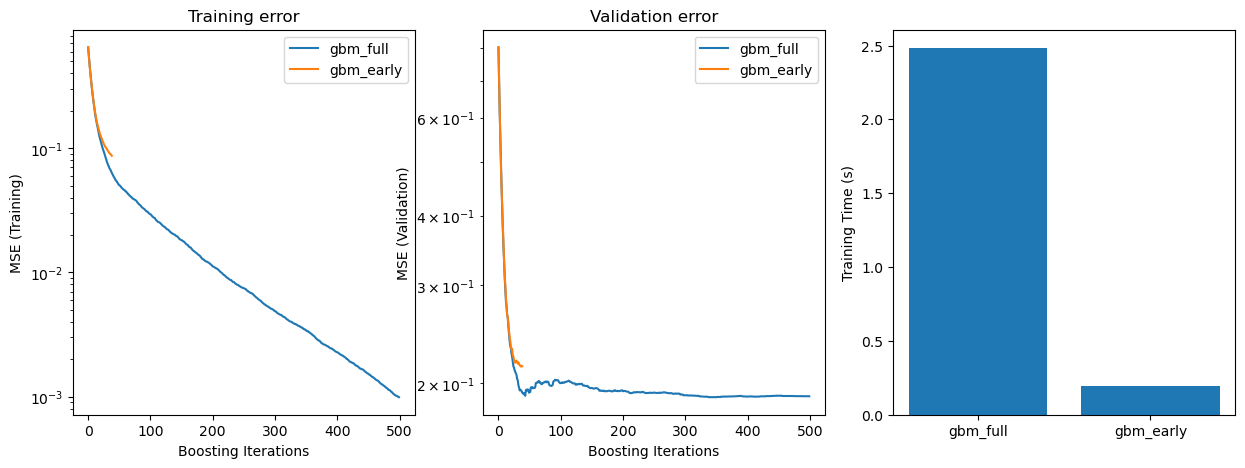

In [8]:
fig,ax = plt.subplots(ncols=3,figsize = (15,5))

# Comparing Training errors full vs early stopping

ax[0].plot(train_errors_full,label = 'gbm_full')
ax[0].plot(train_errors_early,label = 'gbm_early')
ax[0].set_xlabel('Boosting Iterations')
ax[0].set_ylabel('MSE (Training)')
ax[0].set_yscale('log')
ax[0].legend()
ax[0].set_title('Training error')

# Comparing Validation errors full vs early stopping

ax[1].plot(val_errors_full,label = 'gbm_full')
ax[1].plot(val_errors_early,label = 'gbm_early')
ax[1].set_xlabel('Boosting Iterations')
ax[1].set_ylabel('MSE (Validation)')
ax[1].set_yscale('log')
ax[1].legend()
ax[1].set_title('Validation error')

# Comparing Training Times 
ax[2].bar(['gbm_full','gbm_early'],[training_time_full,training_time_early])
ax[2].set_ylabel('Training Time (s)')

Training Time can be reduced by 90% if we only train till say 80 iterations.